<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-расчета-SMAPE" data-toc-modified-id="Функция-расчета-SMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция расчета SMAPE</a></span></li><li><span><a href="#Функция-расчета-score" data-toc-modified-id="Функция-расчета-score-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Функция расчета score</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li></ul></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.


## Подготовка данных

In [1]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.dummy import DummyRegressor

In [2]:
data = [1,1,1]
train_data = pd.read_csv('/datasets/gold_industry_train.csv')
test_data = pd.read_csv('/datasets/gold_industry_test.csv')
full_data = pd.read_csv('/datasets/gold_industry_full.csv')
data = [train_data, test_data, full_data]

In [3]:
for i in range(3):
    display(data[i].head())

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [4]:
for i in range(3):
    data[i].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [5]:
for i in range(3):
    print('Пропусков в таблице', i+1, data[i].isna().sum().sum())
    print('Всего строк в выборке:', data[i].shape[0], '\n')

Пропусков в таблице 1 3050
Всего строк в выборке: 14579 

Пропусков в таблице 2 375
Всего строк в выборке: 4860 

Пропусков в таблице 3 4481
Всего строк в выборке: 19439 



В условии сказано, что "соседние по времени параметры часто похожи", значит мы можем воспользоваться методом ffill, чтобы избавиться от пропусков

In [6]:
for i in range(3):
    data[i].ffill(axis=0, inplace=True)
    print('Пропусков в таблице', i+1, data[i].isna().sum().sum())
    print('Всего строк в выборке:', data[i].shape[0], '\n')

Пропусков в таблице 1 0
Всего строк в выборке: 14579 

Пропусков в таблице 2 0
Всего строк в выборке: 4860 

Пропусков в таблице 3 0
Всего строк в выборке: 19439 



In [7]:
for i in range(3):
    print('Кол-во дубликатов в выборке', i+1, 'равно:', data[i].duplicated().sum())

Кол-во дубликатов в выборке 1 равно: 0
Кол-во дубликатов в выборке 2 равно: 0
Кол-во дубликатов в выборке 3 равно: 0


In [8]:
c = train_data['rougher.output.concentrate_au']
f = train_data['rougher.input.feed_au']
t = train_data['rougher.output.tail_au']
recovery = (c*(f-t))*100/(f*(c-t))
target = train_data['rougher.output.recovery']
print('Значение MAE равно:', mean_absolute_error(target, recovery))

Значение MAE равно: 1.1181885454685472e-14


Значение MAE небольшое, значит эффективность обогащения рассчитана правильно


In [9]:
c = 0
for i in train_data.columns:
    if i not in test_data.columns:
        print(f'Признак: {i}')
        c += 1
print(f'Всего в тестовой выборке отсутствует {c} признака') 
#можно было бы сделать и через разницу .shape[1], но так я проверил код

Признак: rougher.calculation.sulfate_to_au_concentrate
Признак: rougher.calculation.floatbank10_sulfate_to_au_feed
Признак: rougher.calculation.floatbank11_sulfate_to_au_feed
Признак: rougher.calculation.au_pb_ratio
Признак: rougher.output.concentrate_au
Признак: rougher.output.concentrate_ag
Признак: rougher.output.concentrate_pb
Признак: rougher.output.concentrate_sol
Признак: rougher.output.recovery
Признак: rougher.output.tail_au
Признак: rougher.output.tail_ag
Признак: rougher.output.tail_pb
Признак: rougher.output.tail_sol
Признак: primary_cleaner.output.concentrate_au
Признак: primary_cleaner.output.concentrate_ag
Признак: primary_cleaner.output.concentrate_pb
Признак: primary_cleaner.output.concentrate_sol
Признак: primary_cleaner.output.tail_au
Признак: primary_cleaner.output.tail_ag
Признак: primary_cleaner.output.tail_pb
Признак: primary_cleaner.output.tail_sol
Признак: secondary_cleaner.output.tail_au
Признак: secondary_cleaner.output.tail_ag
Признак: secondary_cleaner.outp

Отсутствующие признаки относятся к типу 'calculation' и 'output'. Причина их отсутствия объяснена в описании проекта: "Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков"

In [10]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19439 non-null  float64
 4   rougher.input.feed_sol                              19439 non-null  float64
 5   rougher.input.feed_rate                             19439 non-null  float64
 6   rougher.input.feed_size                             19439 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19439 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19439 non-null  float64


AxesSubplot(0.125,0.125;0.775x0.755)


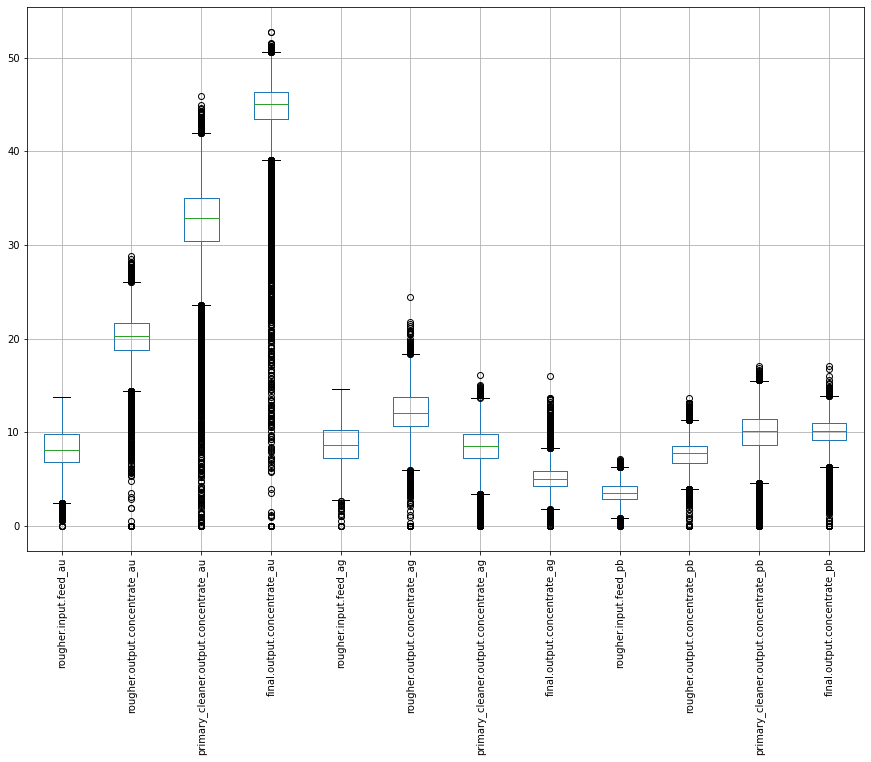

In [11]:
print(full_data.boxplot(column=['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', \
                                'final.output.concentrate_au', 'rougher.input.feed_ag', 'rougher.output.concentrate_ag', \
                                'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag', 'rougher.input.feed_pb', 
                                'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb'], figsize=(15,10), rot=90))

Проеряем на выборсы все признаки и выбираем: median или mean для построения графика распределения концентрации.
Значения  

## Анализ данных

In [12]:
au = []
ag = []
pb = []
def stage_concentration(material_type_array, raw, crude, cleaner, finaly):
    material_type_array.append(full_data[raw].median())
    material_type_array.append(full_data[crude].median())
    material_type_array.append(full_data[cleaner].median())
    material_type_array.append(full_data[finaly].median())
    return material_type_array

print(stage_concentration(au, 'rougher.input.feed_au', 'rougher.output.concentrate_au', \
                          'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au'), '\n')

print(stage_concentration(ag, 'rougher.input.feed_ag', 'rougher.output.concentrate_ag', \
                          'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag'), '\n')

print(stage_concentration(pb, 'rougher.input.feed_pb', 'rougher.output.concentrate_pb', \
                          'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb'), '\n')

[8.125838836648287, 20.280214025891475, 32.841295480233306, 45.01124391455689] 

[8.593574167368724, 12.098114967346191, 8.507297972365805, 5.066039118467836] 

[3.5282347219520145, 7.742580079502529, 10.142270415359071, 10.10226350598865] 



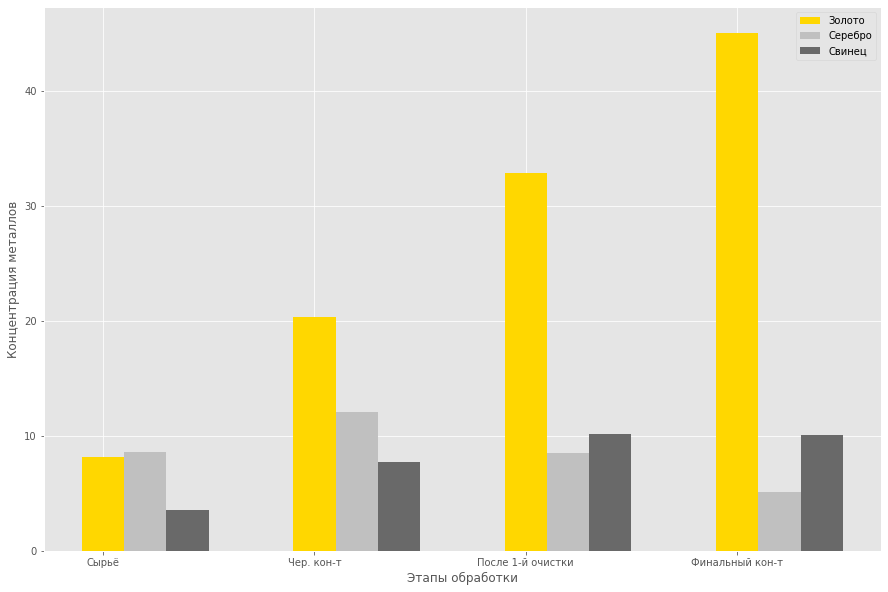

In [13]:
style.use('ggplot')
xname = ['Сырьё', 'Чер. кон-т', 'После 1-й очистки', 'Финальный кон-т']
xpos = np.arange(len(au))
plt.figure(figsize=(15,10))
plt.bar(xpos, au, color='gold', width=0.2, label='Золото')
plt.bar(xpos+0.2, ag, color='silver', width=0.2, label='Серебро')
plt.bar(xpos+0.4, pb, color='dimgray', width=0.2, label='Свинец')
plt.xticks(ticks = xpos, labels=xname)
plt.xlabel('Этапы обработки')
plt.ylabel('Концентрация металлов')
plt.legend()

С каждым этапом обработки концентрация золота растет. И осоебнностей: доля серебра сначала растет (1-2 этап), а потом резко падает; концентрация свинца на последних двух этапах обработки практически идентична, когда как концентрация серебра продолжает падать.

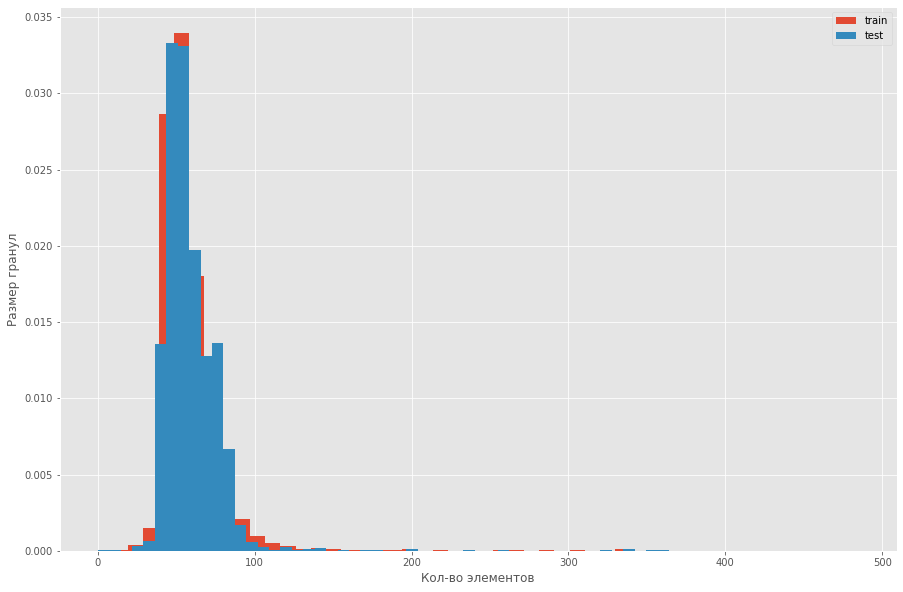

In [14]:
plt.figure(figsize=(15,10))
plt.hist(train_data['rougher.input.feed_size'], density=True, bins=50, label='train')
plt.hist(test_data['rougher.input.feed_size'], density=True, bins=50, label='test')
plt.xlabel('Кол-во элементов')
plt.ylabel('Размер гранул')
plt.legend()

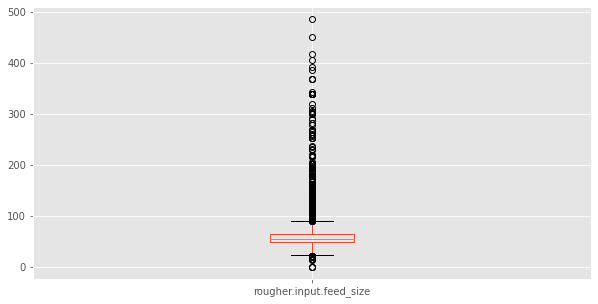

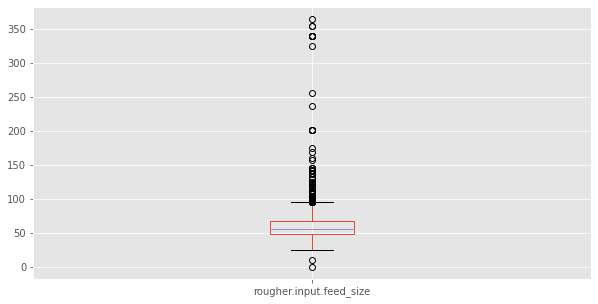

In [15]:
plt.figure(figsize=(10,5))
train_data.boxplot(column=['rougher.input.feed_size'])
plt.show()
plt.figure(figsize=(10,5))
test_data.boxplot(column=['rougher.input.feed_size'])
plt.show()

In [16]:
print(f'Обучающая выборка:\n{train_data["rougher.input.feed_size"].describe()}')
print(f'Тестовая выборка:\n{test_data["rougher.input.feed_size"].describe()}')

Обучающая выборка:
count    14579.000000
mean        59.070865
std         22.903811
min          0.049194
25%         47.322462
50%         54.464259
75%         64.469177
max        484.967466
Name: rougher.input.feed_size, dtype: float64
Тестовая выборка:
count    4860.000000
mean       59.136150
std        19.512497
min         0.046369
25%        47.610795
50%        55.461058
75%        66.538910
max       363.989699
Name: rougher.input.feed_size, dtype: float64


Распределения размеров гранул практически не отличаются, а значит оценка модели должна быть правильной

In [17]:
au = []
ag = []
pb = []
sol = []
def stage_concentration(material_type_array, raw, crude, cleaner, finaly):
    material_type_array.append(full_data[raw].sum())
    material_type_array.append(full_data[crude].sum())
    material_type_array.append(full_data[cleaner].sum())
    material_type_array.append(full_data[finaly].sum())
    return material_type_array


print(stage_concentration(au, 'rougher.input.feed_au', 'rougher.output.concentrate_au', \
                          'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au'), '\n')

print(stage_concentration(ag, 'rougher.input.feed_ag', 'rougher.output.concentrate_ag', \
                          'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag'), '\n')

print(stage_concentration(pb, 'rougher.input.feed_pb', 'rougher.output.concentrate_pb', \
                          'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb'), '\n')

print(stage_concentration(sol, 'rougher.input.feed_sol', 'rougher.output.concentrate_sol', \
                          'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_sol'), '\n')

[160684.66593156557, 384347.9107114745, 624369.0245287111, 856803.3350786205] 

[170964.59423041172, 233166.1271965796, 164111.97062278076, 100468.27426143161] 

[69679.41156014719, 147858.3274961977, 190682.5194985767, 193978.30888732593] 

[712958.1617327845, 559810.9934242333, 201920.63715886662, 183317.36354930865] 



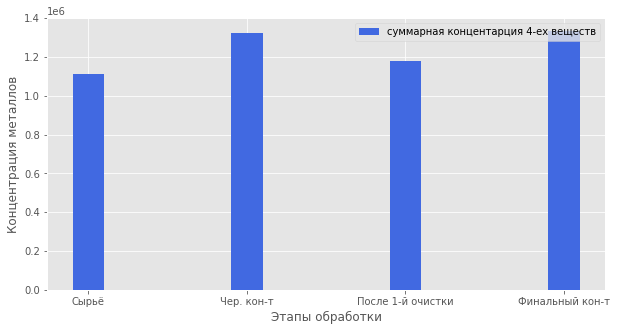

In [18]:
all_material = []
for i in range(len(au)):
    all_material.append(au[i]+ag[i]+pb[i]+sol[i])
xname = ['Сырьё', 'Чер. кон-т', 'После 1-й очистки', 'Финальный кон-т']
xpos = np.arange(len(all_material))
plt.figure(figsize=(10,5))
plt.bar(xpos, all_material, color='royalblue', width=0.2, label='суммарная концентарция 4-ех веществ')
plt.xticks(ticks = xpos, labels=xname)
plt.xlabel('Этапы обработки')
plt.ylabel('Концентрация металлов')
plt.legend()

Суммарная концентрация меняется на каждом этапе обработки, но не сильно. На 1-2 этапах она растет, затем снижается на 3-м этапе и снова растет на 4-м

## Модель

### Функция расчета SMAPE

In [19]:
def smape(predict, target):
    return 100/len(predict) * np.sum(2 * np.abs(target - predict) / (np.abs(predict) + np.abs(target)))

In [20]:
print(train_data[train_data['rougher.output.recovery'] == 0]['rougher.output.recovery'].count())
print(train_data[train_data['rougher.output.recovery'] == 100]['rougher.output.recovery'].count())
print(train_data[train_data['final.output.recovery'] == 0]['final.output.recovery'].count())
print(train_data[train_data['final.output.recovery'] == 100]['final.output.recovery'].count())

394
3
98
72


In [21]:
train_data = train_data.loc[((train_data['rougher.output.recovery'] != 0) & (train_data['rougher.output.recovery'] != 100) \
                             & (train_data['final.output.recovery'] != 0) & (train_data['final.output.recovery'] != 100))]

print(train_data[train_data['rougher.output.recovery'] == 0]['rougher.output.recovery'].count())
print(train_data[train_data['rougher.output.recovery'] == 100]['rougher.output.recovery'].count())
print(train_data[train_data['final.output.recovery'] == 0]['final.output.recovery'].count())
print(train_data[train_data['final.output.recovery'] == 100]['final.output.recovery'].count())

0
0
0
0


In [22]:
features_train = train_data[test_data.columns.values].drop(['date'], axis=1)
target_train_rougher = train_data['rougher.output.recovery']
target_train_final = train_data['final.output.recovery']

In [23]:
print(features_train.columns.values)

['rougher.input.feed_au' 'rougher.input.feed_ag' 'rougher.input.feed_pb'
 'rougher.input.feed_sol' 'rougher.input.feed_rate'
 'rougher.input.feed_size' 'rougher.input.floatbank10_sulfate'
 'rougher.input.floatbank10_xanthate' 'rougher.state.floatbank10_a_air'
 'rougher.state.floatbank10_a_level' 'rougher.state.floatbank10_b_air'
 'rougher.state.floatbank10_b_level' 'rougher.state.floatbank10_c_air'
 'rougher.state.floatbank10_c_level' 'rougher.state.floatbank10_d_air'
 'rougher.state.floatbank10_d_level' 'rougher.state.floatbank10_e_air'
 'rougher.state.floatbank10_e_level' 'rougher.state.floatbank10_f_air'
 'rougher.state.floatbank10_f_level' 'rougher.input.floatbank11_sulfate'
 'rougher.input.floatbank11_xanthate' 'primary_cleaner.input.sulfate'
 'primary_cleaner.input.depressant' 'primary_cleaner.input.feed_size'
 'primary_cleaner.input.xanthate' 'primary_cleaner.state.floatbank8_a_air'
 'primary_cleaner.state.floatbank8_a_level'
 'primary_cleaner.state.floatbank8_b_air'
 'primary_c

### Функция расчета score

In [24]:
def score(model_rougher, model_final, features, target_rougher, target_final):
    score = make_scorer(smape, greater_is_better=True)
    if model_final == 0:
        score_rougher = cross_val_score(model_rougher, features, target_rougher, cv=5, scoring=score).mean()
        score_final = cross_val_score(model_rougher, features, target_final, cv=5, scoring=score).mean()
    else:
        score_rougher = cross_val_score(model_rougher, features, target_rougher, cv=5, scoring=score).mean()
        score_final = cross_val_score(model_final, features, target_final, cv=5, scoring=score).mean()
    return (score_rougher*0.25+score_final*0.75)

### Линейная регрессия

In [25]:
%%time
model = LinearRegression()
print(f'Итоговый sMAPE: {score(model, 0, features_train, target_train_rougher, target_train_final)}\n Модель: {model}' )

Итоговый sMAPE: 8.78007991969113
 Модель: LinearRegression()
CPU times: user 1.95 s, sys: 2.65 s, total: 4.61 s
Wall time: 4.6 s


### Дерево решений

In [26]:
%%time
best_smape = 100
best_depth = 0
best_model = 0
for depth in range(1, 16):
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    t_smape = score(model, 0, features_train, target_train_rougher, target_train_final)
    if t_smape < best_smape:
        best_smape = t_smape
        best_depth = depth
        best_model = model

print(f'Лучший sMAPE: {best_smape}\n Лучшая глубина: {best_depth}\n Модель: {best_model}')

Лучший sMAPE: 8.48801743060245
 Лучшая глубина: 2
 Модель: DecisionTreeRegressor(max_depth=2, random_state=12345)
CPU times: user 57.9 s, sys: 460 ms, total: 58.4 s
Wall time: 58.5 s


### Случайный лес

In [27]:
%%time

parametrs = { 'n_estimators': range (10, 66, 5),
              'max_depth': range (1,16)}
scorer = make_scorer(smape, greater_is_better=False)
model = RandomizedSearchCV(RandomForestRegressor(), param_distributions=parametrs, cv=5, scoring=scorer, n_jobs=-1, verbose=1, random_state=12345)
model_grid = model.fit(features_train, target_train_rougher)
print(f'Лучшие параметры для модели, находящей rougher: {model_grid.best_params_}')
print(model_grid.best_estimator_)
a = model_grid.best_score_
print(a)
model_grid = model.fit(features_train, target_train_final)
print(f'Лучшие параметры для модели, находящей final: {model_grid.best_params_}')
print(model_grid.best_estimator_)
print(model_grid.best_score_)
print(f'sMAPE: {a*-0.25+model_grid.best_score_*-0.75}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Лучшие параметры для модели, находящей rougher: {'n_estimators': 25, 'max_depth': 5}
RandomForestRegressor(max_depth=5, n_estimators=25)
-6.474941871503016
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Лучшие параметры для модели, находящей final: {'n_estimators': 35, 'max_depth': 2}
RandomForestRegressor(max_depth=2, n_estimators=35)
-8.672440867882532
sMAPE: 8.123066118787653
CPU times: user 16min 5s, sys: 4.89 s, total: 16min 10s
Wall time: 16min 11s


In [28]:
%%time
model_rougher = RandomForestRegressor(random_state=12345, n_estimators = 60, max_depth=6)
model_final = RandomForestRegressor(random_state=12345, n_estimators = 35, max_depth=2)
print(score(model_rougher, model_final, features_train, target_train_rougher, target_train_final))

8.115902382514534
CPU times: user 1min 9s, sys: 348 ms, total: 1min 9s
Wall time: 1min 9s


### CatBoostRegressor 

In [29]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()
cat.fit(features_train, target_train_rougher, verbose=False)
a = smape(cat.predict(features_train), target_train_rougher)
print(f'sMAPE для rougher: {a} \n')
cat.fit(features_train, target_train_final, verbose=False)
b = smape(cat.predict(features_train), target_train_final)
print(f'sMAPE для final: {b} \n')
print(f'sMAPE для catboost(rougher+final): {a*0.25+b*0.75}')

sMAPE для rougher: 1.7461826162341618 

sMAPE для final: 3.989388087239352 

sMAPE для catboost(rougher+final): 3.4285867194880546


In [30]:
test_data = test_data.merge(full_data.loc[:, ['date','rougher.output.recovery','final.output.recovery']], on='date')
test_data = test_data.loc[((test_data['rougher.output.recovery'] != 0) & (test_data['rougher.output.recovery'] != 100) \
                             & (test_data['final.output.recovery'] != 0) & (test_data['final.output.recovery'] != 100))]

features_test = test_data.drop(['date','rougher.output.recovery','final.output.recovery'], axis=1)
target_test_final = test_data['final.output.recovery']
target_test_rougher = test_data['rougher.output.recovery']

In [31]:
cat.fit(features_train, target_train_rougher, verbose=False)
a = smape(cat.predict(features_test), target_test_rougher)
print(f'sMAPE для rougher: {a} \n')
cat.fit(features_train, target_train_final, verbose=False)
b = smape(cat.predict(features_test), target_test_final)
print(f'sMAPE для final: {b} \n')
print(f'sMAPE для catboost(rougher+final) на тестовой выборке равно: {a*0.25+b*0.75}')

sMAPE для rougher: 2.5646431373458416 

sMAPE для final: 6.020304711835924 

sMAPE для catboost(rougher+final) на тестовой выборке равно: 5.156389318213403


### Проверка модели на адекватность 

In [32]:
model = DummyRegressor()
print(f'Значение sMAPE DummyRegressor модели: {score(model, 0, features_test, target_test_rougher, target_test_final)}')

Значение sMAPE DummyRegressor модели: 8.763208952458411


Лучшей моделью оказалась: CatBoostRegressor
Результат sMAPE данной модели: 5.156389318213403
sMAPE ниже чему у константной модели, а значит модель работает верно

Вывод:
В ходе проекта были протестированы 4 модели: LinearRegression, DecisionTreeRegressor, RandomForestRegressor и CatBoostRegressor. Гиперпараметры находились с помощью RandomizedSearchCV с кол-вом блоков для кросс-валидации равным 5. Исследование проводилось для двух таргетов: 'rougher.output.recovery' и 'final.output.recovery'.
Результат оценивался на основе данной из ТЗ формулы sMAPE. По результатам исследования:
* Модель с лучшими показателями sMAPE: CatBoostRegressor
* sMAPE на тестовой выборке равен: 5.156389318213403
* Ошибка ниже, чем у константной модели, а значит обученная модель допускается к дальнейшему использованию.